# Relatório Simulaçao 2

## Rede ecológica

#### Bruno Hideki Amadeu Ogata RA: 140884
#### Camilo Maia Pires RA: 140473
#### Matheus Presotto Limonta RA: 140740
#### Victor Hugo Godoi Pedrota RA: 140698 

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


#função simulação vem com as configurações padrão, os parametros são configurados para gerar equilibrio na simulação
def simulacao(A = 1, B = 1, C = 1, D = 1, E = 1,

              p1 = 1/2, p2 = 1/6, p3 = 1/3, p4 = 1/6, p5 = 1/5, p6 = 1/10, p7 = 1/4, p8 = 1/5,

              p9 = 1/2, p10 = 1/10, p11 = 1/2, p12 = 1/10, p13 = 1/10, p14 = 1/10, p15 = 1/10,

              K1 = 10, K2 = 5, K3 = 1, tem_simu = 200, step = 0.01, g1 = 0, g2 = 0, c1 = 'a', c2 = 'b'):
        

    a_array = [A]
    b_array = [B]
    c_array = [C]
    d_array = [D]
    e_array = [E]

    time = [0]

    for t in np.arange(0, tem_simu, step) :

        ### A cadeia simulada seguirá a seguinte configuração
        
        ### E preda B,D - predador
        ### D preda C - predador
        ### C preda B - predador
        ### B consome A - herbivoro
        ### A será o produtor

        varA = A*(p1 - p2*B - p1*A/K1)*step
        varB = B*(-p3 + p4*A - p5*C - p6*E )*step 
        varC = C*(-p7 + p8*B - p9*D - p7*C/K2)*step
        varD = D*(-p10 + p11*C - p12*E)*step
        varE = E*(-p13 + p14*B + p15*D - p13*E/K3)*step


        A += varA
        B += varB
        C += varC 
        D += varD
        E += varE

        if(A <= 0.01):
            A = 0
        if(B <= 0.01):
            B = 0
        if(C <= 0.01):
            C = 0
        if(D <= 0.01):
            D = 0
        if(E <= 0.01):
            E = 0

        a_array.append(A)
        b_array.append(B)
        c_array.append(C)
        d_array.append(D)
        e_array.append(E)
        time.append(t)

    if g1 == 1:
        
        #g1 é a variavel que permite gerar o primeiro gráfico (população em função do tempo)
        plt.plot(time, a_array, color='green', label='A (produtor)')
        plt.plot(time, b_array, color='blue', label='B (herbivoro)')
        plt.plot(time, c_array, color='red', label='C (preda B)')
        plt.plot(time, d_array, color='yellow', label='D (preda C)')
        plt.plot(time, e_array, color='black', label='E (preda B,D)')
        plt.legend()
        plt.show()
        

    if g2 == 1:
        
        #g2 é a variavel que permite gerar o segundo gráfico (população da espécie c2 em função de outra c1)
        arrays = dict ()
        arrays['a'] = a_array
        arrays['b'] = b_array
        arrays['c'] = c_array
        arrays['d'] = d_array
        arrays['e'] = e_array
        
        plt.plot(arrays[c1], arrays[c2])
        plt.xlabel('Espécie ' + c1.upper())
        plt.ylabel('Espécie ' + c2.upper())
        plt.show()



### 1. Modelo matemático
       A rede trófica possui cinco espécies:
<table border="1">
<tr>
<td>A</td>
<td>(Base da cadeia)</td>
</tr>
<tr>
<td>B</td>
<td>Consumidor primário</td>
</tr>
<tr>
<td>C</td>
<td>Consumidor Secundário</td>
</tr>
<tr>
<td>D</td>
<td>Consumidor Terciário</td>
</tr>
<tr>
<td>E</td>
<td>Consumidor Quaternário</td>
</tr>
</table>



        As seguintes equações descrevem o modelo matemático para essa rede trófica:        
$$
    \frac{dA}{dt} = A(p_1 - p_2B - \frac{p_1A}{K_1});
$$\
$$
    \frac{dB}{dt} = B(-p_3 + p_4A - p_5C - p_6E);
$$\
$$
    \frac{dC}{dt} = C(-p_7 + p_8B - p_9D - \frac{p_7D}{K2});
$$\
$$
    \frac{dD}{dt} = D(-p_{10} + p_{11}C - p_{12}E);
$$\
$$
    \frac{dE}{dt} = E(-p_{13} + p_{14}B - p_{15}D - \frac {p13E}{K3});
$$


### 2. Parâmetros de simulação
\
$P_x$ são os x parâmetros que representam a taxa de crescimento das  espécies
\
\
$K_x$ Constantes de meio que limitam o crescimento da espécie

### 3. Simulações, gráficos e discussão
#### 3.1
Nesta primeira simulação teremos todas as espécies começando com a mesma quantidade de indivíduos, com essas configurações padrão eles tendem a ficar em equilibrio, sem aumentar ou diminuir as populações.


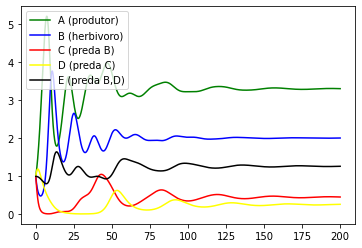

In [2]:
simulacao(g1 = 1)

#### 3.2

Nesta simulação, definimos a população de D 20x maior, tambem alteramos o tempo da simulação pois a ela entra em equilíbrio muito rápido. Vemos no primeiro gráfico que a extinção de C é quase instantânea devido a alta quantidade da espécie D, que a preda. Após a extinção de C vemos que a população de D começa a diminuir drasticamente devido a falta de presas então, assim, resultando em sua extinção. Com isso concluimos que a espécie D é estritamente dependente de C, o que é observado no gráfico 2.

Gráfico 1


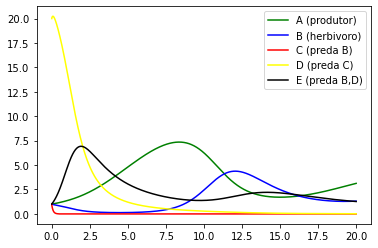

Gráfico 2


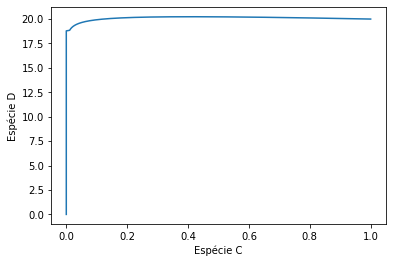

In [20]:
print('Gráfico 1')
simulacao(g1 = 1, D = 20, tem_simu = 20)
print('Gráfico 2')
simulacao(g2 = 1, D = 20, c1 = 'c', c2 = 'd')

#### 3.3
Aqui, temos como prova de que a A é a base do sistema, e todas as outras espécies são dependentes diretamente ou indiretamente de A. Se a população de A for extinta, todas as outras epécies também serão, pois ocorrerá um efeito dominó, onde B será extinta, seguida da extinção de C, depois D e por fim E. Podemos observar no gráfico 2 que apesar de nao ter conexão direta a espécie E depende de A para sobreviver.

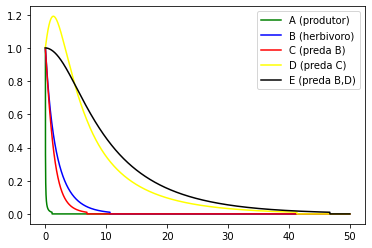

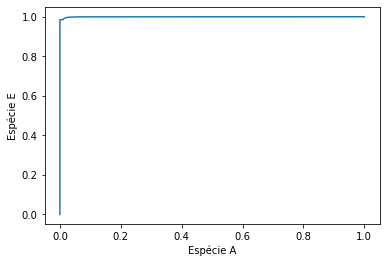

In [8]:
simulacao(g1 = 1, K1 = 0.01, tem_simu = 50, p2 = 2)
diminuiu a constante de meio k1 e aumentou a taxa de consumo de A por B
simulacao(g2 = 1, K1 = 0.01, tem_simu = 50, p2 = 2, c1 = 'a', c2 ='e')

#### 3.4
Nesta simulação aumentamos a taxa de decrescimento natural de E, que acaba se extinguindo, assim ouve uma superpopulação de D o que aumentou a predação de C levando-a a extinção. Desse modo D acabou sendo extinto pela falta de presas. Observando o gráfico de A em relação a B vemos que há uma convergência resultando no equilibrio das populações dessas espécies, pois a taxa de consumo de A por B, não é grande o suficiente para fazer A diminuir, fazendo com que a população de A seja limitada apenas pela constante de meio, que indiretamente influencia na população de B. Colocando a cosntante de meio de A muito grande observe que as poulações de A e B tendem a crescer infinitamente, de forma cíclica, o que confirma que a limitação dessas espécies sem predadores de B é dada pela constante de meio K1.

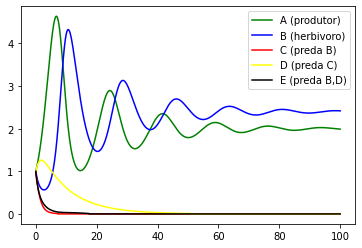

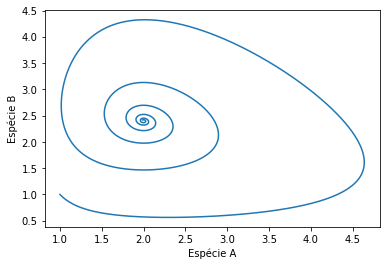

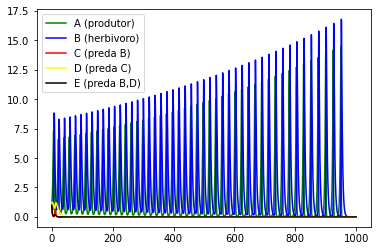

In [6]:
simulacao(g1 = 1, p13 = 0.5, tem_simu = 100)
simulacao(g2 = 1, p13 = 0.5, tem_simu = 100, c1 = 'a', c2 = 'b')
simulacao(g1 = 1, p13 = 0.5, tem_simu = 1000, K1 = 1000000000)

#### 3.5
Nesta simulação fizemos a população de C crescer, aumentando K2 para não limitar C no ambiente, diminuindo p9 que é a taxa de predação de D por C, e por fim aumentando p8 que é a taxa de benefício quando C consome B. Assim podemos observar que a população de C aumentou, levando à extinção de B, o que levou à uma reação em cadeia de extinção de C, depois D e por fim E, deixando uma únic especie A limitada pelo meio.

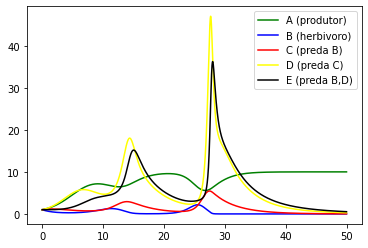

In [19]:
simulacao(g1 = 1, K2 = 100, p9 = 0.0001, p8 = 0.5, tem_simu = 50)